# Final Data Story - Airbnb project
## Start: November 4 2020

*Giovana Fleck*

By taking a look at Airbnb lists, I was to create a visualization of how the city of 
Amsterdam has been affected by the platform and how real state and the speculation market have changed.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import kendalltau
import numpy as np

First, I downloaded data from this website: http://insideairbnb.com/get-the-data.html



I have a few files: 
    1. listings.csv.gz - Detailed Listings data for Amsterdam
    2. calendar.csv.gz - Detailed Calendar Data for listings in Amsterdam
    3. reviews.csv.gz - Detailed Review Data for listings in Amsterdam
    4. listings.csv - Summary information and metrics for listings in Amsterdam (good for visualisations).
    5. reviews.csv - Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked     to a listing).
    6. youthhousing.csv - A list of all student housing buildings in Amsterdam. 
    
And the data for mapping: 
    1. neighbourhoods.csv - Neighbourhood list for geo filter. Sourced from city or open source GIS files.
    2. neighbourhoods.geojson - GeoJSON file of neighbourhoods of the city.
    
 

# Part 1: Listings

Now, I am going to open and read my first dataset: 

In [98]:
df1 = pd.read_csv('listings.csv')

In [99]:
df1.keys()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [100]:
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36424,4.89396,Private room,236,1,340,2020-04-09,2.63,2,0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.15,1,58
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,138,2,219,2020-07-25,2.05,1,158
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,336,2020-09-20,2.72,2,340
5,29051,Comfortable single room,124245,Edwin,NaN,Centrum-West,52.36773,4.89151,Private room,55,2,481,2020-08-28,4.13,2,361
6,31080,2-story apartment + rooftop terrace,133488,Nienke,NaN,Zuid,52.35132,4.84838,Entire home/apt,219,3,32,2017-10-16,0.29,1,0
7,41125,Amsterdam Center Entire Apartment,178515,Fatih,NaN,Centrum-West,52.37891,4.88321,Entire home/apt,160,4,89,2020-02-10,0.74,1,0
8,43109,Oasis in the middle of Amsterdam,188098,Aukje,NaN,Centrum-West,52.37537,4.88932,Entire home/apt,211,3,60,2020-03-07,5.03,1,0
9,44129,Luxury design with canal view,187728,Tatiana,NaN,Centrum-West,52.38071,4.88610,Entire home/apt,115,7,177,2019-03-03,1.43,5,167


In [101]:
df1.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.878200e+04,1.878200e+04,0.0,18782.000000,18782.000000,18782.000000,18782.000000,18782.000000,16492.000000,18782.000000,18782.000000
mean,2.026571e+07,6.490719e+07,NaN,52.365471,4.889641,155.206208,3.569162,24.746619,0.701629,2.582047,53.631935
std,1.256165e+07,8.311726e+07,NaN,0.016496,0.035922,147.938192,14.151973,54.728818,1.327302,8.630081,107.401414
min,2.818000e+03,3.159000e+03,NaN,52.289270,4.755720,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.965431e+06,9.134263e+06,NaN,52.355130,4.863880,95.000000,2.000000,2.000000,0.140000,1.000000,0.000000
50%,1.893914e+07,2.729216e+07,NaN,52.364740,4.887030,129.000000,2.000000,8.000000,0.330000,1.000000,0.000000
75%,2.991968e+07,8.445316e+07,NaN,52.375370,4.909390,180.000000,3.000000,23.000000,0.680000,1.000000,41.000000
max,4.578300e+07,3.711601e+08,NaN,52.425120,5.068080,8000.000000,1001.000000,856.000000,47.610000,86.000000,365.000000


In [6]:
df1['price'].value_counts(sort=False)

16        2
32       15
48       28
64       35
80      411
96       43
112      36
128      52
144      34
160     265
176      21
192      12
208       5
224      14
240      72
256       9
272       1
288       1
304       2
320      26
336       4
368       2
384       2
400      80
448       2
464       3
480       2
496       1
624       1
640       2
       ... 
111      34
127      29
143      27
159      62
175     321
191      12
207      17
223      10
239      17
255      11
271       7
303       1
319       6
335       4
351       1
4461      1
383       1
399      14
415       2
431       1
447       1
463       2
479       3
495       6
511       1
559       1
687       1
799       2
1119      1
1135      1
Name: price, Length: 533, dtype: int64

In [7]:
#Wow what are this two listings available for 16 euros? 
df1.sort_values(by='price')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3125,6764212,C,2793078,Nimesh,NaN,De Pijp - Rivierenbuurt,52.35491,4.88769,Entire home/apt,5,2,14,2018-04-02,0.23,1,0
12989,26626917,Hostelle - Female only hostel,200160744,Hostelle,NaN,Bijlmer-Centrum,52.31605,4.95342,Shared room,16,1,0,NaN,NaN,1,326
14721,31945057,Bed in 10 Bed Dorm,237150727,The Flying Pig Uptown,NaN,Zuid,52.36032,4.87840,Hotel room,16,1,140,2020-03-04,8.99,3,1
6748,13925001,Nice room in de Pijp,38835892,Alexander,NaN,De Pijp - Rivierenbuurt,52.35121,4.89280,Private room,17,4,3,2016-08-07,0.06,1,0
15885,36221425,Couch to crash on in Amsterdam-North.,188577795,Chichi,NaN,Noord-West,52.41646,4.89011,Shared room,17,1,12,2020-03-19,0.77,4,362
18572,45072261,Bed in 8 Bed Dorm,237150727,The Flying Pig Uptown,NaN,Zuid,52.35941,4.87934,Hotel room,18,1,23,2020-10-10,14.38,3,155
7096,14368264,Spacious Modren Room for One In Amsterdam,47479242,Eldad & Louise,NaN,IJburg - Zeeburgereiland,52.35668,4.99939,Private room,18,3,1,2018-02-01,0.03,3,0
12588,25355910,Rebel dolphin seaship,711896,La Bella,NaN,Oud-Noord,52.39051,4.90581,Shared room,18,30,81,2020-06-28,2.82,5,0
11665,22873186,Cosy Studio in Amsterdam,68968214,Shambhavi,NaN,Watergraafsmeer,52.35251,4.95033,Entire home/apt,19,3,3,2018-08-20,0.11,1,0
5115,11147683,Minimalist White Room,34203893,Daniela,NaN,Bos en Lommer,52.37251,4.84258,Private room,19,6,4,2016-07-27,0.07,1,0


In [8]:
#What neighborhood are most common? 
df1['neighbourhood'].value_counts()

De Baarsjes - Oud-West                    3185
De Pijp - Rivierenbuurt                   2353
Centrum-West                              2028
Centrum-Oost                              1625
Westerpark                                1421
Zuid                                      1332
Oud-Oost                                  1233
Bos en Lommer                             1069
Oostelijk Havengebied - Indische Buurt     905
Oud-Noord                                  594
Watergraafsmeer                            523
IJburg - Zeeburgereiland                   448
Slotervaart                                392
Noord-West                                 383
Noord-Oost                                 267
Buitenveldert - Zuidas                     233
Geuzenveld - Slotermeer                    213
Osdorp                                     128
De Aker - Nieuw Sloten                     126
Gaasperdam - Driemond                      120
Bijlmer-Centrum                            105
Bijlmer-Oost 

In [9]:
#What about types of rooms? 
df1['room_type'].value_counts()

Entire home/apt    14664
Private room        3922
Hotel room           134
Shared room           62
Name: room_type, dtype: int64

In [104]:
#Hmmm, ok. But let's move on to the next dataset: 
df2 = pd.read_csv('reviews.csv')
df2.keys()

Index(['listing_id', 'date'], dtype='object')

In [105]:
df2['date'].value_counts() #It seems that april to June are popular months, but let's check. 

2019-04-22    1102
2019-06-02    1041
2017-05-28    1007
2018-04-02     971
2017-04-17     958
2018-05-13     911
2019-10-20     858
2020-01-02     828
2019-09-15     827
2019-11-03     816
2019-01-01     810
2020-02-16     770
2018-05-21     765
2018-10-21     751
2019-05-05     749
2019-08-18     747
2019-06-10     746
2019-04-28     744
2018-11-04     742
2019-06-16     736
2019-10-21     735
2019-05-12     732
2018-04-22     723
2017-09-17     721
2019-05-19     710
2016-05-08     710
2017-05-01     709
2019-04-21     708
2019-04-14     706
2018-01-01     706
              ... 
2011-03-28       1
2011-07-21       1
2011-08-25       1
2010-12-13       1
2012-03-28       1
2011-08-31       1
2011-07-20       1
2011-04-01       1
2012-03-29       1
2010-10-13       1
2010-11-01       1
2011-01-11       1
2011-12-08       1
2013-03-07       1
2012-12-13       1
2012-10-14       1
2011-08-14       1
2009-09-06       1
2012-02-19       1
2013-01-25       1
2011-07-03       1
2011-06-08  

In [106]:
#For July
df2['date'].str.count('^\d{4}\-(0?[7]|1[012])\-(0?[1-9]|[12][0-9]|3[01])$').value_counts()

0    317992
1    146799
Name: date, dtype: int64

In [107]:
#For June
df2['date'].str.count('^\d{4}\-(0?[6]|1[012])\-(0?[1-9]|[12][0-9]|3[01])$').value_counts()

0    322757
1    142034
Name: date, dtype: int64

In [108]:
#For May
df2['date'].str.count('^\d{4}\-(0?[5]|1[012])\-(0?[1-9]|[12][0-9]|3[01])$').value_counts()

0    319982
1    144809
Name: date, dtype: int64

# Part 2: Nuisance

Ok, now I want to look at something else. Lets try the nuisance data:

In [109]:
df3 = pd.read_excel('2020-jaarboek-312.xlsx')

In [110]:
df3

,Unnamed: 0,2017,2018,2019,abs.,%
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Confused person,6302.0,6917.0,7523.0,606.0,"+8,8"
2,Notification of nuisance by youth,3176.0,2699.0,3057.0,358.0,"+13,3"
3,Nuisance because of drugs,941.0,1213.0,1657.0,444.0,"+36,6"
4,Nusaince due to homeless people,857.0,1358.0,1988.0,630.0,"+46,4"
5,Other violations of public order,623.0,548.0,433.0,-115.0,-21
6,Noise because of restaurants/bars/cafés,49.0,75.0,77.0,2.0,"+2,7"
7,Nuisance because of events,6.0,11.0,19.0,8.0,"+72,7"
8,Noise-related problem because of other things,4237.0,4507.0,4333.0,-174.0,-3.9
9,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#hmmm lets clean it up a bit 
df3_tidy = df3.dropna()
df3_tidy

,Unnamed: 0,2017,2018,2019,abs.,%
1,Confused person,6302.0,6917.0,7523.0,606.0,"+8,8"
2,Notification of nuisance by youth,3176.0,2699.0,3057.0,358.0,"+13,3"
3,Nuisance because of drugs,941.0,1213.0,1657.0,444.0,"+36,6"
4,Nusaince due to homeless people,857.0,1358.0,1988.0,630.0,"+46,4"
5,Other violations of public order,623.0,548.0,433.0,-115.0,-21
6,Noise because of restaurants/bars/cafés,49.0,75.0,77.0,2.0,"+2,7"
7,Nuisance because of events,6.0,11.0,19.0,8.0,"+72,7"
8,Noise-related problem because of other things,4237.0,4507.0,4333.0,-174.0,-3.9
10,Totaal registraties overlast,16191.0,17328.0,19087.0,1759.0,"+10,2"


In [112]:
# Rename the columns of df2: df2_tidy

df3_tidier = df3_tidy.rename(columns = {'Unnamed: 0': 'Cause'}, inplace = False)

# Print out df2_tidier
df3_tidier

,Cause,2017,2018,2019,abs.,%
1,Confused person,6302.0,6917.0,7523.0,606.0,"+8,8"
2,Notification of nuisance by youth,3176.0,2699.0,3057.0,358.0,"+13,3"
3,Nuisance because of drugs,941.0,1213.0,1657.0,444.0,"+36,6"
4,Nusaince due to homeless people,857.0,1358.0,1988.0,630.0,"+46,4"
5,Other violations of public order,623.0,548.0,433.0,-115.0,-21
6,Noise because of restaurants/bars/cafés,49.0,75.0,77.0,2.0,"+2,7"
7,Nuisance because of events,6.0,11.0,19.0,8.0,"+72,7"
8,Noise-related problem because of other things,4237.0,4507.0,4333.0,-174.0,-3.9
10,Totaal registraties overlast,16191.0,17328.0,19087.0,1759.0,"+10,2"


In [113]:
#Just doing some checks before I move on
df3_tidier.dtypes

Cause     object
2017     float64
2018     float64
2019     float64
abs.     float64
%         object
dtype: object

In [114]:
df3_tidier.describe()

,2017,2018,2019,abs.
count,9.000000,9.000000,9.000000,9.000000
mean,3598.000000,3850.666667,4241.555556,390.888889
std,5188.965335,5543.859238,6062.215624,597.069813
min,6.000000,11.000000,19.000000,-174.000000
25%,623.000000,548.000000,433.000000,2.000000
50%,941.000000,1358.000000,1988.000000,358.000000
75%,4237.000000,4507.000000,4333.000000,606.000000
max,16191.000000,17328.000000,19087.000000,1759.000000


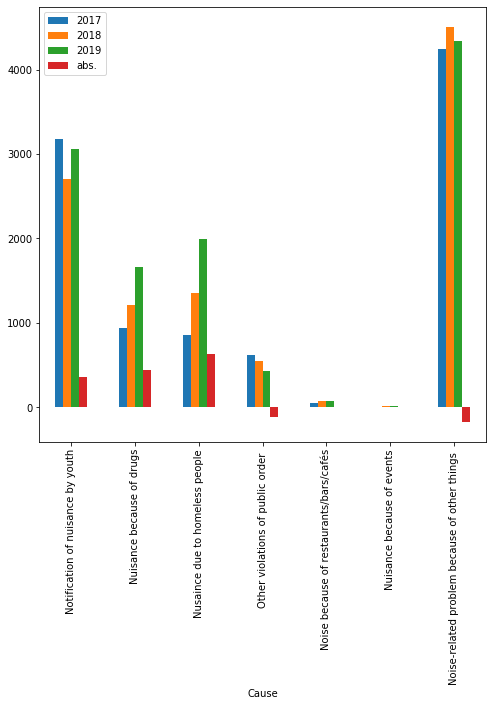

In [115]:
#Ok, good. Now let's plot this data:
df3_tidier[1:8].plot(kind = 'bar', figsize=(8,8), x='Cause')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ecbb8d0>],
      dtype=object)

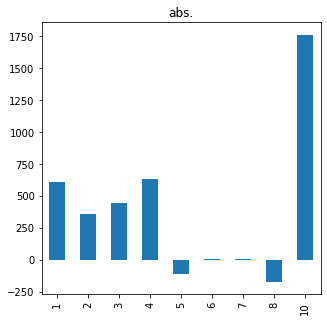

In [116]:
df3_tidier['abs.'].plot(x='Cause', kind='bar', figsize=(5,5), subplots=True)

This is quite interesting. From this simple visualization, we can see that the most nuisance complaints can be linked to Airbnb rentings - either from the youth or being registered as "other causes" (which is admitedly too broad, might be worth a call to the police department). 

But, first, I wanted to move on and zoom in some dates. 

# Part 3: Calendar

In [117]:
df4 = pd.read_csv('calendar.csv.gz')

In [118]:
df4

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2020-10-10,f,$59.00,$59.00,NaN,NaN
1,2818,2020-10-11,t,$59.00,$59.00,3.0,1125.0
2,2818,2020-10-12,t,$59.00,$59.00,3.0,1125.0
3,2818,2020-10-13,t,$59.00,$59.00,3.0,1125.0
4,2818,2020-10-14,t,$59.00,$59.00,3.0,1125.0
5,2818,2020-10-15,t,$59.00,$59.00,3.0,1125.0
6,2818,2020-10-16,t,$59.00,$59.00,3.0,1125.0
7,2818,2020-10-17,t,$59.00,$59.00,3.0,1125.0
8,2818,2020-10-18,t,$59.00,$59.00,3.0,1125.0
9,2818,2020-10-19,t,$59.00,$59.00,3.0,1125.0


This dataset is important because I wanted to see if there is a pattern between the date of the listing and an increase in the rental prices/nuisance.

In [119]:
df4['date'].value_counts().head()

2021-09-26    18782
2020-11-21    18782
2021-03-31    18782
2021-02-24    18782
2020-12-31    18782
Name: date, dtype: int64

Ok, but this is not really helpful. It is not the dataset I was expecting, since it only give me listings from 2020 to 2021. It's too updated. So, I might want to go back to df1.

In [120]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36424,4.89396,Private room,236,1,340,2020-04-09,2.63,2,0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.15,1,58
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,138,2,219,2020-07-25,2.05,1,158
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,336,2020-09-20,2.72,2,340


Now, I think I want to merge it with df2 to get a better sense of when and where. Let me just remember what is in there:

In [121]:
df2.head()

,listing_id,date
0,2818,2009-03-30
1,2818,2009-04-24
2,2818,2009-05-03
3,2818,2009-05-18
4,2818,2009-05-25


Cool, lets do an inner join in id(df1)/listing_id(df2). First, to make my life easier, let me just change this column name: 

In [125]:
df2_tidy = df2.rename(columns = {'listing_id': 'id'}, inplace = False)


In [126]:
merged = df1.merge(df2_tidy, on= ['id'], how='inner')

In [127]:
merged.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-03-30
1,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-04-24
2,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-05-03
3,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-05-18
4,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-05-25


In [134]:
#uhu! 
date = merged['date'].value_counts()
date.head() #Hmmm quite many reservations in April. I would guess it's because of Kings Day. 

2019-04-22    1102
2019-06-02    1041
2017-05-28    1007
2018-04-02     971
2017-04-17     958
Name: date, dtype: int64

In [133]:
neighb = merged['neighbourhood'].value_counts()
neighb.head() #And, as predicted, many of those reservations happen in the Center. 

Centrum-West               85816
De Baarsjes - Oud-West     68892
Centrum-Oost               55441
De Pijp - Rivierenbuurt    52169
Westerpark                 30263
Name: neighbourhood, dtype: int64

In [136]:
price = merged['price'].value_counts()
price.head()

100    13266
150    12943
75     12108
85     11077
120    10832
Name: price, dtype: int64

Now let's plot it!

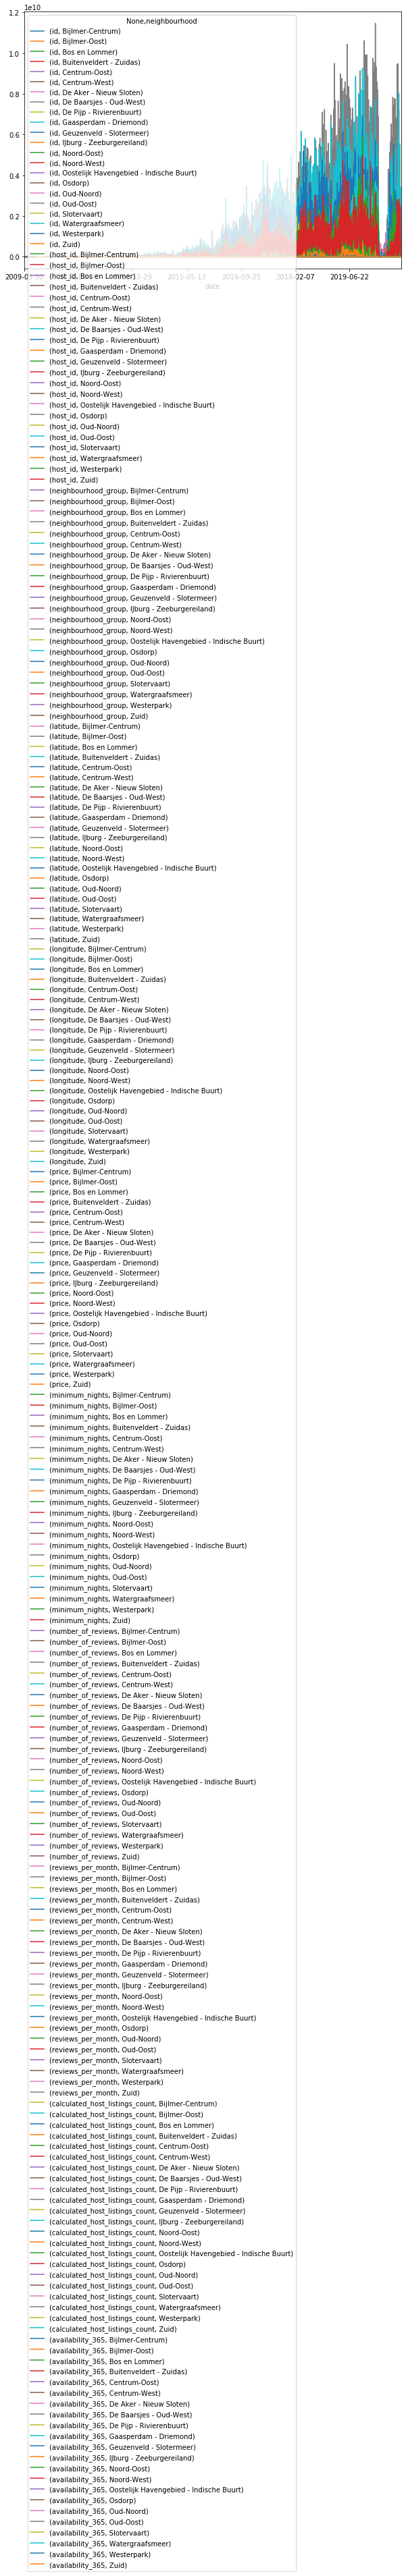

In [142]:
merged.groupby(['date','neighbourhood']).agg(sum).unstack().plot(figsize=(10,7))

Too much information. Let's try something else: 

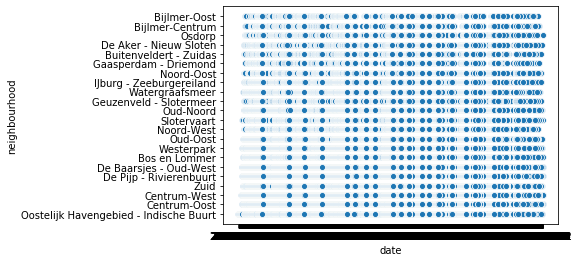

In [143]:
sns.scatterplot(x = "date", y = "neighbourhood", data=merged)
plt.show()

#hahahahcrying 
Ok, maybe somethings else: 

In [145]:
merged['year'] = pd.DatetimeIndex(merged['date']).year
merged.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date,year
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-03-30,2009
1,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-04-24,2009
2,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-05-03,2009
3,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-05-18,2009
4,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-05-25,2009


In [146]:
merged['month'] = pd.DatetimeIndex(merged['date']).month
merged.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date,year,month
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-03-30,2009,3
1,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-04-24,2009,4
2,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-05-03,2009,5
3,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-05-18,2009,5
4,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.98,1,0,2009-05-25,2009,5


Obs. Here, I want to figure out how to best visualize the variation of price per month and neighborhood. 

While I think about it, let's move on.

# Par 4: Maps 

Now, I wanted to star mapping it. To do that, I moved to QGIS to work with the shape files. 

But, those shapefiles still have interesting information that can be explored here. Like the variation of m2 in Amsterdam.

In [1]:
import geopandas 
!pip install geoplot
import geoplot

  Using cached geoplot-0.4.1-py3-none-any.whl (28 kB)
  Using cached Cartopy-0.18.0.tar.gz (14.4 MB)
Using legacy 'setup.py install' for cartopy, since package 'wheel' is not installed.
    Running setup.py install for cartopy ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/giovanafleck/.pyenv/versions/3.6.5/bin/python3.6 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/73/582svb0s6wbfx814ybtqbwj40000gn/T/pip-install-69aajok2/cartopy/setup.py'"'"'; __file__='"'"'/private/var/folders/73/582svb0s6wbfx814ybtqbwj40000gn/T/pip-install-69aajok2/cartopy/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/73/582svb0s6wbfx814ybtqbwj40000gn/T/pip-record-r_9fodf6/install-record.txt --single-version-externally-managed --compile --install-headers /Users/giovanafleck/.pyenv/ve

You should consider upgrading via the '/Users/giovanafleck/.pyenv/versions/3.6.5/bin/python3.6 -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'geoplot'

In [5]:
import fiona

In [16]:
shapefile_path = r"WONINGWAARDE/WONINGWAARDE_2019.shp"
df4 = geopandas.read_file(shapefile_path)

In [18]:
df4.head()

,Lower,Upper,LABEL,SELECTIE,geometry
0,3292.0,3950.0,3292 - 3950,3292,"POLYGON Z ((125898.47780012 481640.0000104 0, ..."
1,3292.0,3950.0,3292 - 3950,3292,"POLYGON Z ((116421.07481444 488560.0000116 0, ..."
2,3292.0,3950.0,3292 - 3950,3292,"POLYGON Z ((127768.78927868 485827.647646 0, 1..."
3,3292.0,3950.0,3292 - 3950,3292,"POLYGON Z ((117351.75528236 485220.0000054 0, ..."
4,3292.0,3950.0,3292 - 3950,3292,"POLYGON Z ((115483.5645476 484339.483683 0, 11..."


Lower indicates the lowest price of this property and upper the highest price over the year of 2019.

In [25]:
df4['Lower'].describe()

count    1922.000000
mean     5337.163309
std      1528.632897
min      2010.740000
25%      3950.000000
50%      5267.000000
75%      6585.000000
max      7901.000000
Name: Lower, dtype: float64

In [26]:
df4['Upper'].describe()

count     1922.000000
mean      7083.203434
std       3762.613926
min       2633.000000
25%       4609.000000
50%       5926.000000
75%       7901.000000
max      16510.000000
Name: Upper, dtype: float64

# Par 5: Next steps 

What I have: A map with the variation of prices in Amsterdam in the past three years. 

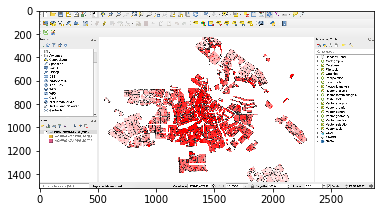

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
image = mpimg.imread('map_1.png')
plt.imshow(image)
#This is the map:

I combined that with the airbnb longitude and latidutes. And got an interesting result that shows that, the areas with the highest price are the areas with the most aribnbs.




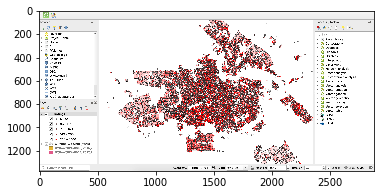

In [12]:
image = mpimg.imread('map_2.png')
plt.imshow(image)
#This is the map:

## Next steps: 

1. My next step is to refine this map. I plan on doing it in an interactive way so the person can hoover over the points (airbnb listings) and the different years from 2017 to 2019 to see what changed in the city. Any suggestion on how to do it are more than welcome! I know I could use Flourish or DataWrapper, but if there's any python library that you advice I'm willing to try! I'm pushing myself out of the comfort zone with cartography haha 


2. I also have the analysis on the nuisance complains, which require a call to the security department for further explanations, since some concepts there are too broad. I'm also placing a request for locations of nuisance complains. I would like to see if they might also be connected to student housing locations (obs. youth dataset). 

3. I also wanted to play a bit more with my data in this notebook and have some graphs on the variance of prices in Airbnb listings and m2 in Amsterdam. 

With that, I believe I have a story - or something close to it. 
